In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
datos=pd.read_csv(r"C:\Users\mati_\Desktop\Diplomatura_en_ciencia_de_datos\Archivos_de_datos\Arbolado-en-espacios-verdes.csv")

In [39]:
especies = ['Ombú', 'Ceibo', 'Acacia']                # Genero la lista de valores deseados
datos_especies = datos[datos['nombre_com'].isin(especies)] # Filtro el dataset original a los que tienen cualquiera de esas expresiones


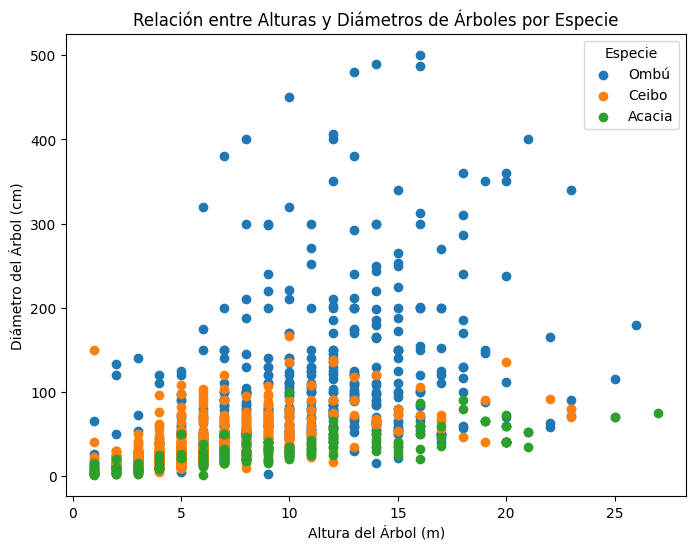

In [42]:
 #Gráfico de puntos de alturas vs diámetros para las especies seleccionadas
plt.figure(figsize=(8, 6))
# Loop para que cada especie quede graficada con un color distinto y darle el nombre en la leyenda
for especie in especies:
    datos_especie = datos_especies[datos_especies['nombre_com'] == especie]
    plt.scatter(datos_especie['altura_tot'], datos_especie['diametro'], label=especie)

plt.xlabel('Altura del Árbol (m)')
plt.ylabel('Diámetro del Árbol (cm)')
plt.title('Relación entre Alturas y Diámetros de Árboles por Especie')
plt.legend(title="Especie")        #Toma los valores del 'label' en la línea de plt.scatter, opcional ponerle un título con title = "titulo_de_leyenda"
#plt.savefig('alturas_diametros_especies.pdf')  # 3. Guardar el gráfico en un archivo PDF
plt.show()

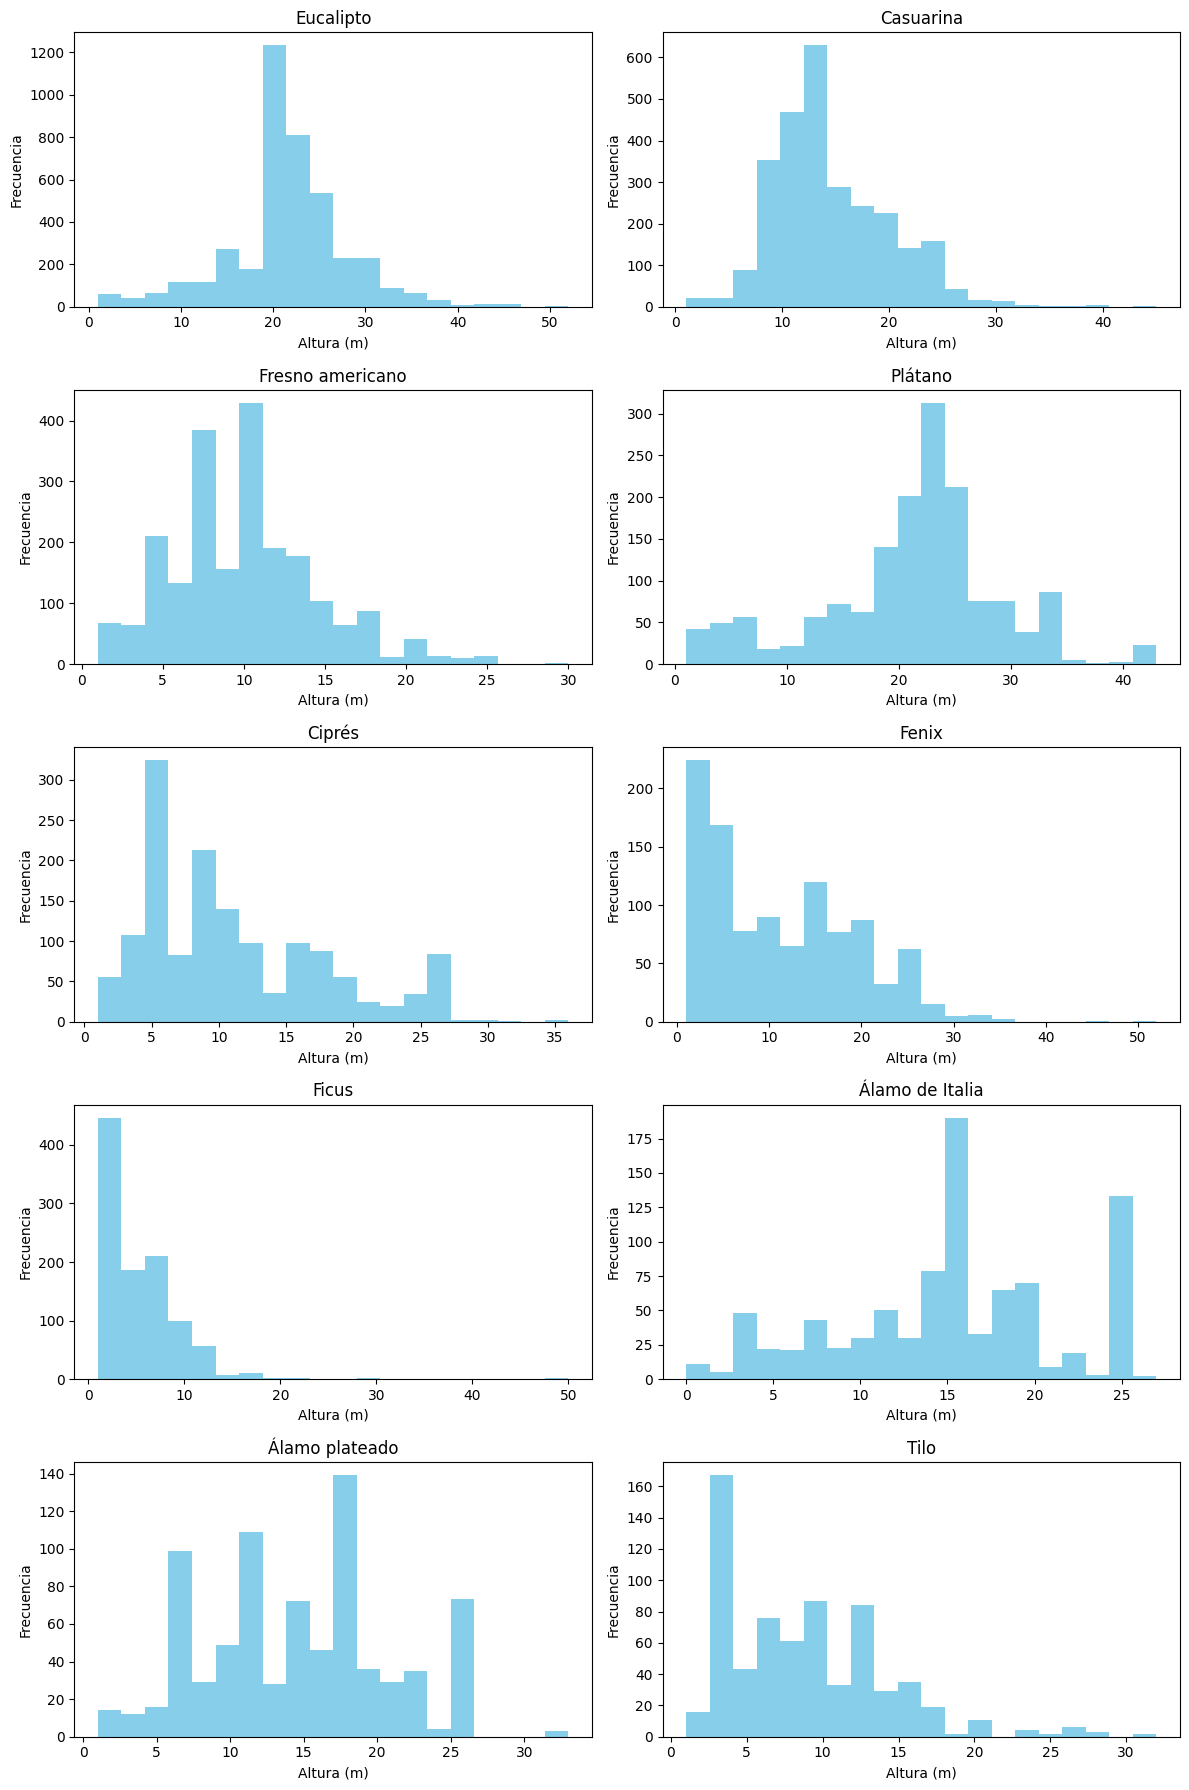

In [47]:
# 2.
# Filtrar los datos por especies de origen exótico
especies_exoticas = datos[datos['origen'] == 'Exótico']

# Obtener las 10 especies con mayor número de ejemplares
# Prueben cada función de manera secuencial para ver el proceso:
#de los datos filtrados, se cuentan instancias de cada nombre_com, después nos quedamos con el top 10,
#se toma el índice de ese output que son los nombres, y se lo transdorma en lista (porque sino queda en formato Index del dataframe de Pandas)
especies_top10 = especies_exoticas['nombre_com'].value_counts().head(10).index.tolist()

# Crear subplots para cada especie
#Sabemos que son 10, por lo que la figura se define con 10 subplots (por ejemplo, 5 filas y 2 columnas)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))
axes = axes.flatten()

# Iterar sobre las especies y generar los gráficos en los subplots
for i, especie in enumerate(especies_top10):
    ax = axes[i]
    datos_especie = especies_exoticas[especies_exoticas['nombre_com'] == especie]
    ax.hist(datos_especie['altura_tot'], bins=20, color='skyblue')
    ax.set_title(especie)
    ax.set_xlabel('Altura (m)')
    ax.set_ylabel('Frecuencia')
  
# Ajustar espacio entre subplots y mostrar el gráfico
plt.tight_layout()
# plt.savefig('grafico_exoticas.jpg', dpi=300)   # 3. Guardar el gráfico en un archivo JPG
plt.show()